# Getting Started

In this project, we will explore the sms/text message data and try to come up with diffirent possible models to predict if a sms/text is spam or ham.

First and foremost we need to define the problem statement, here our problem is easy to understand, we have two kinds of SMS.

1. Spam
2. Ham

This make it a classification problem and to be more accurate, it is basically a binarry classification problem because we have just two target classes (Spam, Ham). Target variable is know for all the sms/text hence it is a supervised problem.
The data set we are dealing is a text data set hence it is problem in domain of **Supervised Text Binary Classification**


**Now Let's start!**

In [112]:
# importing the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!python3 -m pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

# Data Collection

We don't need any code to collect the data here because data is already available on below link. 

https://www.kaggle.com/uciml/sms-spam-collection-dataset/download/
    
We have downloaded the data kept it in the same folder as this notebook.

# Data Cleaning

In [2]:
# reading the dataset
data = pd.read_csv('spam.csv', encoding='latin-1')

# In latin1 each character is exactly one byte long. 
#In utf8 a character can consist of more than one byte. 
#Consequently utf8 has more characters than latin1 
#(and the characters they do have in common aren't necessarily represented by the same byte/bytesequence).

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
# Lets see if we have any feature with missing values

In [6]:
# Checking for null values in the dataset
data.isnull().any()

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

In [7]:
data.isnull().all()

v1            False
v2            False
Unnamed: 2    False
Unnamed: 3    False
Unnamed: 4    False
dtype: bool

In [8]:
data.count(axis=0)

#count function just counts non-null values

v1            5572
v2            5572
Unnamed: 2      50
Unnamed: 3      12
Unnamed: 4       6
dtype: int64

We see that feature 'Unnamed:2', 'Unnamed:3' and 'Unnamed:4' have only few non-null values hence there is no point in going for filling the missing values for these features.

so, we do not need features 'Unnamed:2', 'Unnamed:3' and 'Unnamed:4', we can drop them. Also, we can change column 'v1' to 'class': spam or ham and v2 as 'text'

In [9]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [10]:
# renaming columns v1 as class and v2 as text# renamin 
data = data.rename(columns={'v1': 'class', 'v2': 'text'})

In [11]:
data.shape

(5572, 2)

In [12]:
data.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Lets find out the class distribution

In [13]:
data['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [14]:
data['class'].value_counts()/float(len(data))*100

ham     86.593683
spam    13.406317
Name: class, dtype: float64

Text(0, 0.5, 'Frequency')

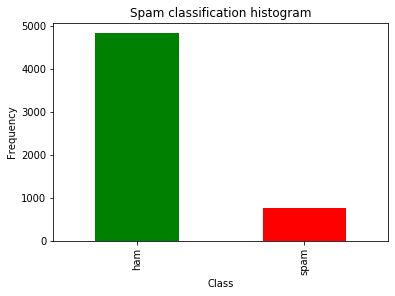

In [15]:
count_classes = pd.value_counts(data['class'], sort = True).sort_index()
count_classes.plot(kind = 'bar',color=['green', 'red'])
plt.title("Spam classification histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

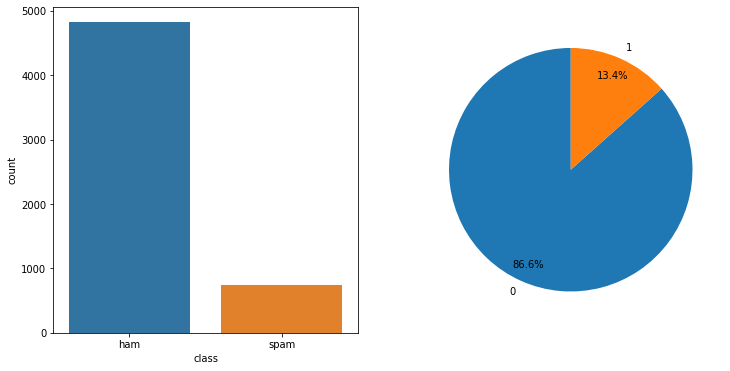

In [16]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(data['class'], ax=axs[0])
axs[1].pie(data.groupby(data['class'])['text'].count(), labels=[0, 1], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.show()

<font color =blue>
13.4% of the sms/text are Spam while rest 86.6% examples are ham. This is an example of skewed or imbalanced dataset
</font>

In [17]:
# convert classes to 1 if Spam and 0 if not# convert 
data['class'] = np.where(data['class']=='spam',1,0)
X = data['text']
y = data['class']

# Spam is 1, Ham is 0

In [18]:
from  sklearn.model_selection import train_test_split
# splitting the data into training and test sets
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Spliting into train:test to 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=np.random)

In [19]:
X_train.shape

(3900,)

# Data Exploration

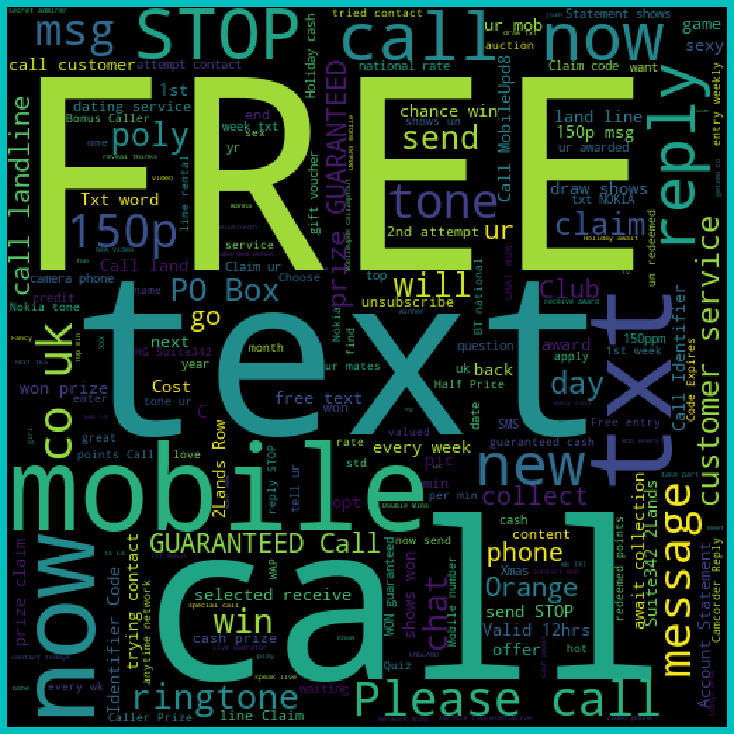

In [31]:
from wordcloud import WordCloud
# visualizing the spam words using wordcloud
spam_words = ''.join(list(data[data['class']==1]['text']))
spam_word_cloud = WordCloud(width=512, height=512).generate(spam_words)
plt.figure(figsize=(10,10), facecolor='c')
plt.imshow(spam_word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

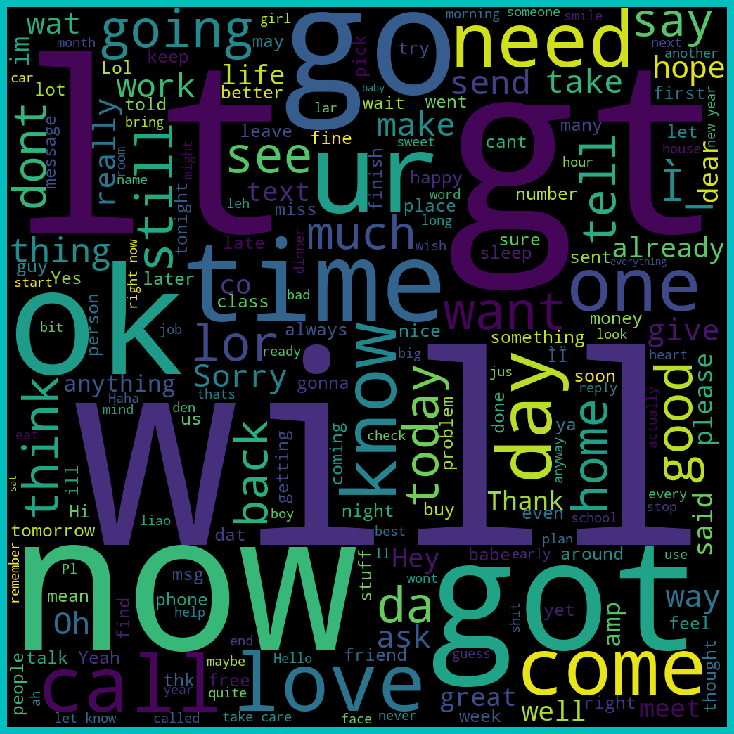

In [30]:
from wordcloud import WordCloud
# visualizing the ham words using wordcloud
ham_words = ''.join(list(data[data['class']==0]['text']))
ham_word_cloud = WordCloud(width=1024, height=1024).generate(ham_words)
plt.figure(figsize=(10,10), facecolor='c')
plt.imshow(ham_word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Based on the WordCloud, we can see spam text has for more frequent words like Free, Call, please call**

**Lets also see the average length of document and it's effect on target class**

In [33]:
spam_data = data[data['class'] == 1]
not_spam_data = data[data['class'] == 0]

spam_avg_doc_len = spam_data['text'].str.len().mean()
not_spam_avg_doc_len = not_spam_data['text'].str.len().mean()

print('Average length of documents for spam:',spam_avg_doc_len)
print('Average length of documents for ham:',not_spam_avg_doc_len)

Average length of documents for spam: 138.8661311914324
Average length of documents for ham: 71.02362694300518


Text(0, 0.5, 'Average length')

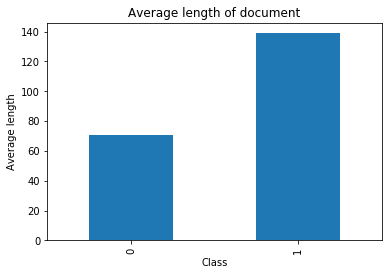

In [34]:
avg_doc_len = pd.DataFrame([not_spam_avg_doc_len, spam_avg_doc_len])
avg_doc_len.plot(kind = 'bar', legend=False)
plt.title("Average length of document")
plt.xlabel("Class")
plt.ylabel("Average length")

**Average length looks like an important feature and should be considered for building our classifier**

In [37]:
spam_avg_digits_per_doc = spam_data['text'].str.count(r'\d').mean()
not_spam_avg_digits_per_doc = not_spam_data['text'].str.count(r'\d').mean()

print('Average no. of digits per document for spam:',spam_avg_digits_per_doc)
print('Average no. of digits per document for not spam:',not_spam_avg_digits_per_doc)

Average no. of digits per document for spam: 15.759036144578314
Average no. of digits per document for not spam: 0.2992746113989637


Text(0, 0.5, 'Average no. of digits')

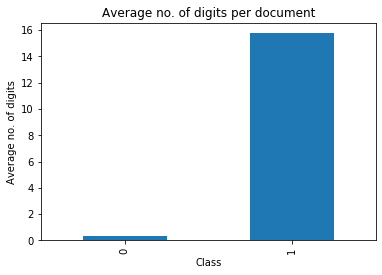

In [38]:
avg_doc_len = pd.DataFrame([not_spam_avg_digits_per_doc, spam_avg_digits_per_doc])
avg_doc_len.plot(kind = 'bar', legend=False)
plt.title("Average no. of digits per document")
plt.xlabel("Class")
plt.ylabel("Average no. of digits")

**we can conclude that number of digits per document is also an important feature for classification**

**Average number of non word characters**

In [42]:
spam_avg_non_word_chars = spam_data['text'].str.count(r'[^a-zA-Z0-9-]+').mean()
not_spam_avg_non_word_chars = not_spam_data['text'].str.count(r'[^a-zA-Z0-9-]+').mean()

print('Average no. of digits per document for spam:',spam_avg_non_word_chars)
print('Average no. of digits per document for not spam:',not_spam_avg_non_word_chars)

Average no. of digits per document for spam: 24.589022757697457
Average no. of digits per document for not spam: 14.32518134715026


Text(0, 0.5, 'Average no. of non word chars')

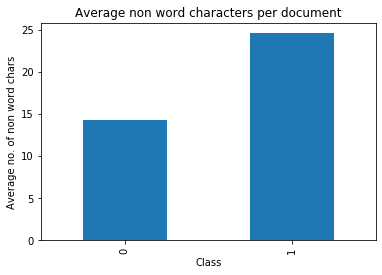

In [43]:
avg_doc_len = pd.DataFrame([not_spam_avg_non_word_chars, spam_avg_non_word_chars])
avg_doc_len.plot(kind = 'bar', legend=False)
plt.title("Average non word characters per document")
plt.xlabel("Class")
plt.ylabel("Average no. of non word chars")

As, we see that spam messages tend to have more non word characters as compared to regular messages, we can add this as a feature as well.

# Data Preprocessing

Let's fit and transform training data using Tfidf Vectorizer with default parameters and find 20 features with smallest tf-idfs and 20 features with largest tf-idfs.

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
tfidf = TfidfVectorizer(min_df=3)
# tokenize and build vocab
tfidf.fit(X_train)
# encode the training data
idf = tfidf.idf_
X_train_v = tfidf.transform(X_train)
X_test_v = tfidf.transform(X_test)
tfidf_dict = dict(zip(tfidf.get_feature_names(), idf))
tfidf_df = pd.DataFrame.from_dict(tfidf_dict, orient='index').reset_index()
tfidf_df.columns=('token','idf')
tfidf_df = tfidf_df.sort_values(by='idf', ascending=False)

In [137]:
X_train_v.shape

(3900, 2207)

In [48]:
X_test_v.shape

(1672, 2207)

In [ ]:
# Feature Engineering

# Model Training

### Multinomial Naive Bayes Classifier

As a baseline, let's build a classfier using Multinomial Naive Bayes algorithm without any additional fetaures.

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

modelNB = MultinomialNB(alpha=0.1)
modelNB.fit(X_train_v, y_train)
y_pred = modelNB.predict(X_test_v)
print(roc_auc_score(y_test, y_pred))

0.9569597069597069


In [55]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [56]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[1452    4]
 [  18  198]]


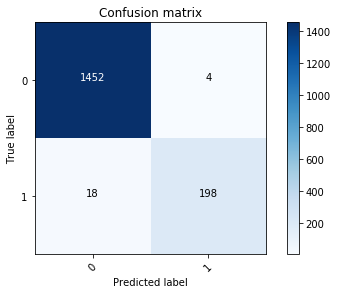

In [57]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [66]:
from sklearn.metrics import recall_score

print(recall_score(y_test, y_pred))

0.9166666666666666


# Feature Engineering

In [67]:
from scipy.sparse import csr_matrix, hstack

# returns sparse feature matrix with added feature. feature_to_add can also be a list of features.
def add_feature(X, feature_to_add):
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [68]:
def length_of_doc(X):
    return X.str.len()

def no_of_digits_per_doc(X):
    return X.str.count(r'\d')

def no_of_non_word_chars(X):
    return X.str.count(r'[^a-zA-Z0-9-]+')

In [69]:
doc_len_train = length_of_doc(X_train)
doc_len_test =  length_of_doc(X_test)

digits_per_doc_train = no_of_digits_per_doc(X_train)
digits_per_doc_test = no_of_digits_per_doc(X_test) 

non_word_chars_train = no_of_non_word_chars(X_train)
non_word_chars_test = no_of_non_word_chars(X_test)

X_train_v = add_feature(X_train_v, doc_len_train)
X_train_v = add_feature(X_train_v, digits_per_doc_train)
X_train_v = add_feature(X_train_v, non_word_chars_train)

X_test_v = add_feature(X_test_v, doc_len_test)
X_test_v = add_feature(X_test_v, digits_per_doc_test)
X_test_v = add_feature(X_test_v, non_word_chars_test)

In [70]:
X_train_v.shape

(3900, 2210)

In [71]:
X_test_v.shape

(1672, 2210)

In [74]:
modelNB = MultinomialNB(alpha=0.1)
modelNB.fit(X_train_v, y_train)
y_pred = modelNB.predict(X_test_v)
print(roc_auc_score(y_test, y_pred))

0.9525844525844528


Confusion matrix, without normalization
[[1446   10]
 [  19  197]]


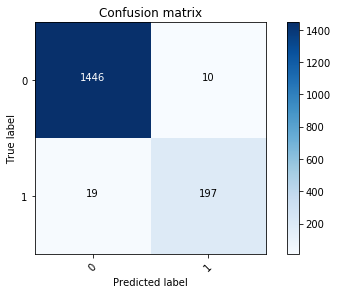

In [75]:
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [77]:
print(recall_score(y_test, y_pred))

0.9120370370370371


### SVM Classifier

In [80]:
from sklearn.svm import SVC
clfsvm = SVC(C=10000)
clfsvm.fit(X_train_v, y_train)
y_pred = clfsvm.predict(X_test_v)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [81]:
print(roc_auc_score(y_pred, y_test))

0.9959128065395095


In [82]:
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[1456    0]
 [  12  204]]


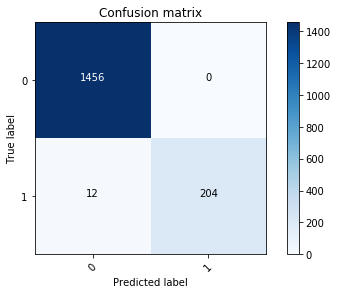

In [83]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [84]:
print(recall_score(y_test, y_pred))

0.9444444444444444


### Logistic Regression Classifier

In [85]:
from sklearn.linear_model import LogisticRegression

clflr = LogisticRegression(C=100)
clflr.fit(X_train_v, y_train)
y_pred = clflr.predict(X_test_v)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [86]:
print(roc_auc_score(y_pred, y_test))

0.9910528616273063


Confusion matrix, without normalization
[[1454    2]
 [  12  204]]


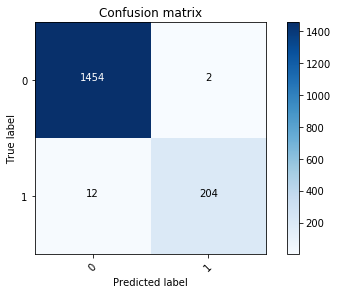

In [87]:
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [88]:
print(recall_score(y_test, y_pred))

0.9444444444444444


### RNN

In [96]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [97]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [108]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

In [120]:
model.fit(sequences_matrix,y_train,batch_size=128,epochs=10,
          validation_split=0.3,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 2730 samples, validate on 1170 samples
Epoch 1/10
2730/2730 [==============================] - 3s 1ms/step - loss: 0.0341 - acc: 0.9897 - val_loss: 0.0400 - val_acc: 0.9880
Epoch 2/10
2730/2730 [==============================] - 3s 1ms/step - loss: 0.0245 - acc: 0.9941 - val_loss: 0.0333 - val_acc: 0.9923
Epoch 3/10
2730/2730 [==============================] - 3s 1ms/step - loss: 0.0190 - acc: 0.9941 - val_loss: 0.0370 - val_acc: 0.9897


In [121]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [126]:
test_sequences_matrix

array([[  0,   0,   0, ..., 208, 808, 974],
       [  0,   0,   0, ...,  84,  94,  68],
       [  0,   0,   0, ...,  54,  13, 306],
       ...,
       [  0,   0,   0, ...,  35,  26,  18],
       [  0,   0,   0, ...,  36,  83,  90],
       [  0,   0,   0, ...,  61,  43,   2]], dtype=int32)

In [122]:
accr = model.evaluate(test_sequences_matrix,y_test)

1672/1672 [==============================] - 1s 473us/step


In [127]:
accr

[0.06253847214571562, 0.9826555023923444]

In [123]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.063
  Accuracy: 0.983


**Metrics have been removed from Keras core. You need to calculate them manually. They removed them on 2.0 version. Those metrics are all global metrics, but Keras works in batches. As a result, it might be more misleading than helpful**

In [128]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [131]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
model.fit(sequences_matrix,y_train,batch_size=128,epochs=10,
          validation_split=0.3,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(test_sequences_matrix,y_test)

Train on 2730 samples, validate on 1170 samples
Epoch 1/10
2730/2730 [==============================] - 4s 2ms/step - loss: 0.0111 - acc: 0.9971 - f1_m: 0.9889 - precision_m: 0.9952 - recall_m: 0.9834 - val_loss: 0.0741 - val_acc: 0.9812 - val_f1_m: 0.9297 - val_precision_m: 0.9043 - val_recall_m: 0.9598
Epoch 2/10
2730/2730 [==============================] - 3s 1ms/step - loss: 0.0079 - acc: 0.9978 - f1_m: 0.9913 - precision_m: 0.9908 - recall_m: 0.9924 - val_loss: 0.0661 - val_acc: 0.9872 - val_f1_m: 0.9494 - val_precision_m: 0.9491 - val_recall_m: 0.9543
Epoch 3/10
1672/1672 [==============================] - 1s 492us/step


In [132]:
print(recall)

0.8975620817339591


In [135]:
print(accuracy)

0.9796650717703349


In [133]:
print(precision)

0.9146730386469353


In [134]:
print(f1_score)

0.8998460050975307


# Model Evaluation & Conclusion

In case of spam detection problem, accuracy is not the best measure for evaluating our algorithm as the classes are imbalanced. In this case, our priority is to minimize the False Negatives i.e. an regular message being categorized as Spam. Therefore, our algorithm should have a high recall score = TP / TP + FN.

Let's compare our models below:

- Multinomial Naive Bayes without additional features: Accuracy = 93.30%, Recall = 86.65%
- Multinomial Naive Bayes with additional features: Accuracy = 95.40%, Recall = 91.78%
- SVM Classifier with additional features: Accuracy = 98.45%, Recall = 94.98%
- Logistic Regression with additional features: Accuracy = 99.28%, Recall = 93.60%
- RNN Accuracy =97.9% and Recall = 89.75% 

Although, Logisitic Regression model has the highest accuracy, the SVM classifier has the highest recall and slightly lower accuracy, therefore SVM should be the choice of classifier.